In [2]:
%cd ..

/Users/jorgensandhaug/Documents/github_documents/option_pricing_framework


In [3]:
import yfinance as yf
from utils.historical_data import fit_all_distributions, fit_distribution
import numpy as np
import pandas as pd

# to 27-02-2024
data = yf.download("TSLA", period="max")
now = pd.to_datetime('2024-02-28')
data = data[:now]
returns = np.log(data["Close"] / data["Close"].shift(1)).dropna()
data



/opt/homebrew/anaconda3/envs/fin/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6471: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)
/opt/homebrew/anaconda3/envs/fin/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:723: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  a, b = optimize.fsolve(func, (1.0, 1.0))


t: (3.1432668004447994, 0.0014441329643080799, 0.023115476469877758)
gennorm: (0.9866757000680004, 0.00122987578573472, 0.024221771370321266)
skewnorm: (-0.788114303666406, 0.02155379602872911, 0.04096200937856265)
beta: (180888.63298401097, 92255.56453783493, -26.099650666004827, 39.41293992389693)
norm: (0.0014082744126594348, 0.03566587006598437)
lognorm: (0.00456291027156178, -7.811839886006229, 7.813196000890434)
gamma: (2046.3287327916878, -1.6145286536082954, 0.0007896319151938893)
weibull_min: (6.549227167454891, -0.24161742860676128, 0.2579445547246715)
genextreme: (0.1696497043049957, -0.013219531531922034, 0.03984970991554802)
gumbel_r: (-0.01664091616973256, 0.047286878944289255)
genhalflogistic: (0.6075509724536763, -0.2365179093508788, 0.27634332297255426)
genpareto: (-0.769973620505507, -0.23651789452041047, 0.35072570326945574)
expon: (-0.23651789445767657, 0.237926168870336)
pareto: (70514379.15201539, -16777216.236517895, 16777216.0)


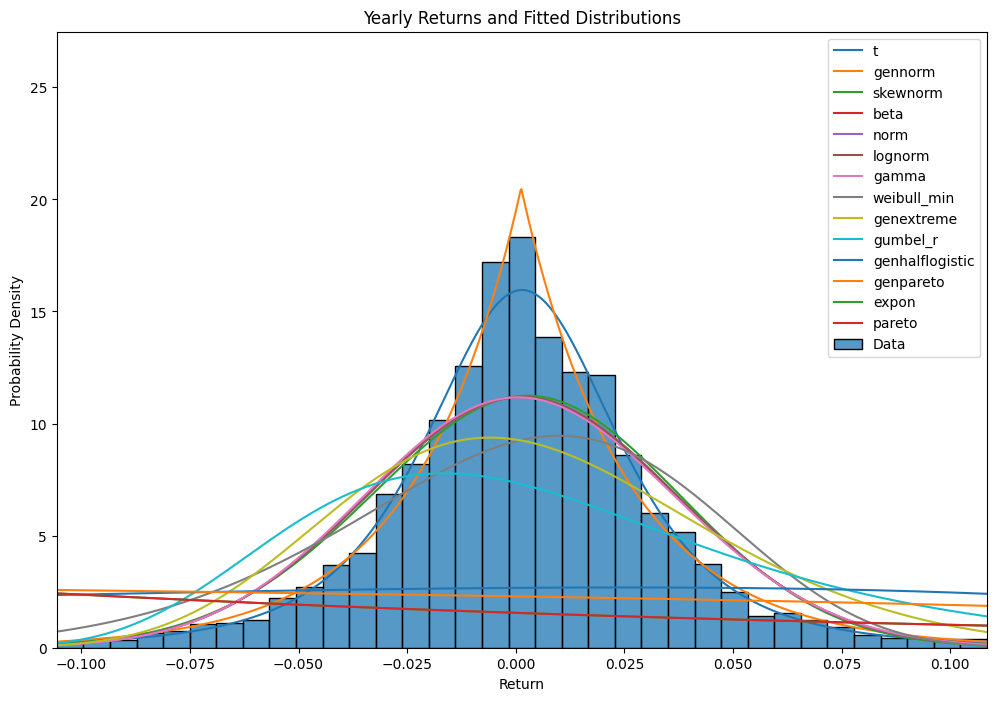

Mean return: 0.0014082744126594348
Volatility: 0.03567105669730185
Frequency: 1 (days)
Annualized Mean: 0.35488515199017756
Annualized volatility: 0.5662604701436743


In [ ]:
fit_all_distributions(returns)

In [ ]:
t = fit_distribution(returns, "t")

df, loc, scale = t

#std = scale*np.sqrt(df/(df -2))
std = np.std(returns)

print(f"Standard Deviation: {std:.5f}")

print(f"df: {df}, loc: {loc}, scale: {scale}")

from distributions.t_distribution import TDistribution
from distributions.normal_distribution import NormalDistribution
t_dist = TDistribution(df)

Standard Deviation: 0.03567
df: 3.1432668004447994, loc: 0.0014441329643080799, scale: 0.023115476469877758


In [ ]:
import pandas as pd

file_path = 'data/TSLA_options.xlsx'
options_data = pd.read_excel(file_path, header=1)  # Skip the first row which contains some info and use the second row as headers
options_data.head()


,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest
0,TSLA240301P00100000,2024-02-27 3:44PM EST,100.0,0.01,0.0,0.0,0,-,1,1.007
1,TSLA240301P00105000,2024-02-16 2:54PM EST,105.0,0.01,0.0,0.0,0,-,2,0.000
2,TSLA240301P00110000,2024-02-23 1:23PM EST,110.0,0.01,0.0,0.0,0,-,1,0.000
3,TSLA240301P00115000,2024-02-22 12:58PM EST,115.0,0.01,0.0,0.0,0,-,240,0.000
4,TSLA240301P00120000,2024-02-26 1:11PM EST,120.0,0.01,0.0,0.0,0,-,2,790.000


In [ ]:
# Convert "Last Trade Date" column to datetime, handling unrecognized timezones
options_data["Last Trade Date"] = pd.to_datetime(options_data["Last Trade Date"], errors='coerce')

# Get only those who have last trade date at or after 28-02-2024
options_data = options_data[options_data["Last Trade Date"] >= pd.to_datetime("2024-02-28")]
options_data.head()

/var/folders/zz/50jdxpms0512wj_qt0tzxqlh0000gn/T/ipykernel_7196/2048095472.py:2: FutureWarning: Parsed string "2024-02-27 3:44PM EST" included an un-recognized timezone "EST". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  options_data["Last Trade Date"] = pd.to_datetime(options_data["Last Trade Date"], errors='coerce')
/var/folders/zz/50jdxpms0512wj_qt0tzxqlh0000gn/T/ipykernel_7196/2048095472.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  options_data["Last Trade Date"] = pd.to_datetime(options_data["Last Trade Date"], errors='coerce')
/var/folders/zz/50jdxpms0512wj_qt0tzxqlh0000gn/T/ipykernel_7196/2048095472.py:2: FutureWarning: Parsed string "2024-02-16 2:54PM EST" included an un-recognized timezone

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest
7,TSLA240301P00135000,2024-02-28 15:20:00,135.0,0.01,0.0,0.0,0,-,13,2.135
8,TSLA240301P00140000,2024-02-28 13:26:00,140.0,0.01,0.0,0.0,0,-,2,0.000
9,TSLA240301P00145000,2024-02-28 15:20:00,145.0,0.01,0.0,0.0,0,-,12,1.717
10,TSLA240301P00150000,2024-02-28 14:59:00,150.0,0.01,0.0,0.0,0,-,16,0.000
11,TSLA240301P00152500,2024-02-28 12:09:00,152.5,0.01,0.0,0.0,0,-,3,918.000


In [ ]:
def parse_contract_name(contract_name):
    import re
    
    # Define a regex pattern to match the contract name format
    pattern = re.compile(r"([A-Z]+)(\d{2})(\d{2})(\d{2})([CP])(\d+)")
    match = pattern.match(contract_name)
    
    if not match:
        raise ValueError("Invalid contract name format")
    
    ticker, year, month, day, call_put, strike = match.groups()
    
    # Extract the expiration date
    year = int("20" + year)
    month = int(month)
    day = int(day)
    expiration_date = pd.Timestamp(year, month, day)
    
    # Determine the option type
    if call_put == 'C':
        option_type = 'call'
    elif call_put == 'P':
        option_type = 'put'
    else:
        raise ValueError("Invalid call/put indicator in contract name")
    
    # Extract the strike price
    strike_price = int(strike) / 1000
    
    return ticker, strike_price, expiration_date, option_type

In [ ]:
import pandas as pd
from pandas.tseries.offsets import CustomBusinessDay
from pandas.tseries.holiday import USFederalHolidayCalendar

def num_trading_days(start_date, end_date):
    us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
    trading_days = pd.date_range(start=start_date, end=end_date, freq=us_bd)
    return len(trading_days)

In [ ]:
import scipy.optimize as opt
import numpy as np

def error_function(simulated_price, market_price):
    return simulated_price - market_price

def implied_volatility_simulation(pricer, option_params, market_price, initial_vol=0.2, simulation_params=None, bounds=[(1e-6, 5.0)], method='Nelder-Mead'):
    def objective(sigma):
        simulated_price = pricer.price({**option_params, 'volatility': sigma}, simulation_params)
        return (error_function(simulated_price, market_price))**2  # Squared error for minimization
    
    result = opt.minimize(objective, x0=[initial_vol], bounds=bounds, method=method)
    if result.success:
        return result.x[0]
    else:
        print(f"Optimization with {method} failed: {result.message}")
    
    # If all methods fail, return None
    return None

def implied_volatility_bs(pricer, option_params, market_price, initial_vol=0.2, bounds=[(1e-6, 5.0)]):
    def objective(sigma):
        simulated_price = pricer.price({**option_params, 'volatility': sigma})
        return (error_function(simulated_price, market_price))**2  # Squared error for minimization
    
    # Use minimize with Nelder-Mead or other suitable method
    result = opt.minimize(objective, x0=[initial_vol], bounds=[(1e-6, 5.0)], method='Nelder-Mead')
    
    if result.success:
        return result.x[0]
    else:
        print(f"Optimization failed: {result.message}")
        return None


In [ ]:
from models.european.european_option_simulation import EuropeanOptionSimulationModel
from models.european.black_scholes import BlackScholesModel
from simulations.geometric_brownian_motion import GeometricBrownianMotion
from models.volatility_models.garch import GARCHModel
import matplotlib.pyplot as plt

# S0 = data["Open"].iloc[-1]
S0 = 202.2
r_yearly = 0.055  # 1M tbill at 28-02-2024
r = r_yearly / 252

print(f"Current Stock Price: {S0:.5f}")

prices = {"BS": [], "T Dist": [], "Normal Dist": [], "Market": [], "GARCH": []}
strikes = []

for index, row in options_data.iterrows():
    K = row["Strike"]
    P_market = row["Last Price"]
    contract_name = row["Contract Name"]
    ticker, strike, expiration_date, option_type = parse_contract_name(contract_name)
    print(f"{contract_name} {K} {P_market} {expiration_date} {option_type}")

    assert K == strike

    T = num_trading_days(now, expiration_date)

    option_params = {
        'initial_stock_price': S0,
        'strike_price': K,
        'time_to_maturity': T,
        'risk_free_rate': r,
        'volatility': std,
        'option_type': option_type,
        'is_american': False,
    }

    simulation_params = {
        'initial_stock_price': S0,
        'time_to_maturity': T,
        'risk_free_rate': r,
        'volatility': scale,
        'time_steps': 1,
        'simulation_paths': 1000000,
        'distribution_model': t_dist
    }

    gbm_t = GeometricBrownianMotion(simulation_params)
    option_pricer = EuropeanOptionSimulationModel(gbm_t)
    price = option_pricer.price(option_params)

    bs = BlackScholesModel()
    bs_price = bs.price(option_params)

    normal_simulation_params = {**simulation_params, 'distribution_model': NormalDistribution(), 'volatility': std}
    gbm_normal = GeometricBrownianMotion(normal_simulation_params)
    option_pricer_normal = EuropeanOptionSimulationModel(gbm_normal)
    price_normal = option_pricer_normal.price(option_params)

    
    garch = GARCHModel(1,1)
    garch.fit(returns)
    forecast = garch.forecast(horizon=T)
    garch_simulation_params = {**normal_simulation_params, 'volatilities': forecast}
    gbm_garch = GeometricBrownianMotion(garch_simulation_params)
    option_pricer_garch = EuropeanOptionSimulationModel(gbm_garch)
    price_garch = option_pricer_garch.price(option_params)
    

    prices["BS"].append(bs_price)
    prices["T Dist"].append(price)
    prices["GARCH"].append(price_garch)
    prices["Normal Dist"].append(price_normal)
    prices["Market"].append(P_market)
    strikes.append(K)

    # bs_implied_vol = implied_volatility_bs(bs, option_params, P_market, initial_vol=0.06, bounds=[(0.005, 0.2)])

    # gbm_normal_implied_vol = implied_volatility_simulation(option_pricer_normal, option_params, P_market, initial_vol=0.06, simulation_params=normal_simulation_params, bounds=[(0.005, 0.2)])

    # gbm_t_implied_vol = implied_volatility_simulation(option_pricer, option_params, P_market, initial_vol=0.06, simulation_params=simulation_params, bounds=[(0.005, 0.2)]) * np.sqrt((df-2)/df)

    # implied_vols["BS"].append((K, bs_implied_vol))
    # implied_vols["T Dist"].append((K, gbm_t_implied_vol))
    # implied_vols["Normal Dist"].append((K, gbm_normal_implied_vol))

    # print(f"Implied volatility for {K} with time to maturity {T} days: {bs_implied_vol:.5f} {gbm_t_implied_vol:.5f} {gbm_normal_implied_vol:.5f}")

    print(f"European Call Price for {K} with time to maturity {T} days: {P_market:.5f}, using Simulation (T Dist): {price:.5f}\t Black Scholes: {bs_price:.5f}\t Normal Dist: {price_normal:.5f}")

# Plot the prices
plt.figure(figsize=(10, 6))
plt.plot(strikes, prices["Market"], label="Market Price", marker='o')
plt.plot(strikes, prices["BS"], label="Black Scholes", marker='x')
plt.plot(strikes, prices["T Dist"], label="T Dist", marker='s')
plt.plot(strikes, prices["Normal Dist"], label="Normal Dist", marker='d')
plt.xlabel("Strike Price")
plt.ylabel("Option Price")
plt.title("Option Prices for European Call Options")
plt.legend()
plt.show()

Current Stock Price: 202.20000
TSLA240301P00135000 135.0 0.01 2024-03-01 00:00:00 put
[[0.03047477 0.03058723 0.03069704]]
European Call Price for 135.0 with time to maturity 3 days: 0.01000, using Simulation (T Dist): 0.01711	 Black Scholes: 0.00000	 Normal Dist: 0.00000
TSLA240301P00140000 140.0 0.01 2024-03-01 00:00:00 put
[[0.03047477 0.03058723 0.03069704]]
European Call Price for 140.0 with time to maturity 3 days: 0.01000, using Simulation (T Dist): 0.02198	 Black Scholes: 0.00000	 Normal Dist: 0.00000
TSLA240301P00145000 145.0 0.01 2024-03-01 00:00:00 put
[[0.03047477 0.03058723 0.03069704]]
European Call Price for 145.0 with time to maturity 3 days: 0.01000, using Simulation (T Dist): 0.02860	 Black Scholes: 0.00000	 Normal Dist: 0.00000
TSLA240301P00150000 150.0 0.01 2024-03-01 00:00:00 put
[[0.03047477 0.03058723 0.03069704]]
European Call Price for 150.0 with time to maturity 3 days: 0.01000, using Simulation (T Dist): 0.03768	 Black Scholes: 0.00000	 Normal Dist: 0.00000
T

KeyboardInterrupt: 

In [ ]:
# # Plot the implied vols
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 6))
# plt.plot(*zip(*implied_vols["BS"]), label="Black Scholes")
# plt.plot(*zip(*implied_vols["T Dist"]), label="T Dist")
# plt.plot(*zip(*implied_vols["Normal Dist"]), label="Normal Dist")
# plt.xlabel("Strike Price")
# plt.ylabel("Implied Volatility")
# plt.title("Implied Volatility for European Call Options")
# plt.legend()
# plt.show()
